In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Functions

### Optimally Connected

In [4]:
def is_optimally_connected(graph):
    kappa = nx.minimum_node_cut(graph) # node cut number
    gamma = nx.minimum_edge_cut(graph) # edge cut nomber
    degrees = [val for (node, val) in graph.degree()]
    delta = min(degrees)
    return kappa == gamma and gamma == delta

### Automorphism

In [5]:
def mapped_edge_exists(graph, permute, edge):
    u = edge[0]
    v = edge[1]
    mapped_u = permute.index(u)
    mapped_v = permute.index(v)
    return graph.has_edge(mapped_u, mapped_v)
    
def get_automorphisms(graph):
    # getting all possible permutations
    permutations = list(map(list, itertools.permutations(graph.nodes())))
    
    # if we don't accept automorphism to itself it should be uncommented
    # permutations.remove(list(graph.nodes()))
    
    automorphisms = []
    edges = list(graph.edges())
    for permute in permutations:
        if all([mapped_edge_exists(graph, permute, edge) for edge in edges]):
            automorphisms.append(permute)
    
    return automorphisms

### Node Simmilarity

In [6]:
def is_node_similar(graph, automorphisms):
    node_sets = list(itertools.permutations(graph.nodes(), 2))
    for node_set in node_sets:
        if not any([automorphism.index(node_set[0]) == node_set[1] for automorphism in automorphisms]):
            return False
    
    return True

### symmetry

In [7]:
def is_symmetry(graph, automorphisms):
    edges = list(graph.edges())
    edge_sets = list(itertools.permutations(edges, 2))
    
    for (edge1, edge2) in edge_sets:
        (u,v) = edge1
        (x, y) = edge2
        if not any([automorphism.index(u) == x and automorphism.index(v) == y for automorphism in automorphisms]):
            return False
        
    return True

### Node-Similarity and Symmetry (Manual Permutation)

In [8]:
# symmetry functions
def permute_has_symmetry_condition(graph, edge_set, permute):
    ((u,v), (x, y)) = edge_set
    return permute.index(u) == x and permute.index(v) == y

def update_edge_sets(graph, edge_sets, curr):
    for edge_set in edge_sets:
            if permute_has_symmetry_condition(graph, edge_set, curr):
                edge_sets.remove(edge_set)


# node-similarity functions
def permute_has_node_similarity_condition(graph, node_set, permute):
    u = node_set[0]
    v = node_set[1]
    mapped_u = permute.index(u)
    mapped_v = permute.index(v)
    return graph.has_edge(mapped_u, mapped_v)

def update_node_sets(graph, node_sets, curr):
    for node_set in node_sets:
            if permute_has_node_similarity_condition(graph, node_set, curr):
                node_sets.remove(node_set)


# recursive permute function
def permute(graph, node_sets, edge_sets, curr, remain):
    if len(remain) == 0: # having complete permutation
#         print(f'edge_sets len: {len(edge_sets)}')
        update_edge_sets(graph, edge_sets, curr)
        update_node_sets(graph, node_sets, curr)
    
    remain_copy = remain.copy()
    for i in remain:
        if len(edge_sets) == 0 and len(node_sets):
            return
        
        curr.append(i)
        remain_copy.remove(i)
        permute(graph, node_sets, edge_sets, curr, remain_copy)
        remain_copy.append(i)
        curr.remove(i)

def is_node_similar_and_is_symmetry(graph):
    node_sets = list(itertools.permutations(graph.nodes(), 2))
    
    edges = list(graph.edges())
    edge_sets = list(itertools.permutations(edges, 2))
    
    permute(graph,node_sets, edge_sets, [], list(graph.nodes()))
    is_node_similar = len(node_sets) == 0
    is_symmetry = len(edge_sets) == 0
    
    return is_node_similar, is_symmetry

### Get Details

In [80]:
def graph_details(graph, draw_func=nx.draw_circular):
    draw_func(graph, with_labels=True)
    
    # table datas
    node_num = graph.number_of_nodes()
    edge_num = graph.number_of_edges()
    is_oc = is_optimally_connected(graph)
    diameter = nx.diameter(graph)
    automorphisms = get_automorphisms(graph)
    is_ns = is_node_similar(graph, automorphisms)
    is_sym = is_symmetry(graph, automorphisms)
    print(f'{graph.name} Node Number: ', node_num)
    print(f'{graph.name} Edge Number: ', edge_num)
    print(f'{graph.name} Is Optimally Connected: ', is_oc)
    print(f'{graph.name} Diameter: ', diameter)
    print(f'{graph.name} Is Node Simmilar: ', is_ns)
    print(f'{graph.name} Is Symmetry: ', is_sym)

### Get Details (Manual Similarity & Manual Symmetry Functions)

In [79]:
def graph_details_manual_permutation(graph, draw_func=nx.draw_circular):
    draw_func(graph, with_labels=True)
    plt.show()
    
    # table datas
    node_num = graph.number_of_nodes()
    edge_num = graph.number_of_edges()
    is_oc = is_optimally_connected(graph)
    diameter = nx.diameter(graph)
    
    is_ns, is_sym = is_node_similar_and_is_symmetry(graph)
    print(f'{graph.name} Node Number: ', node_num)
    print(f'{graph.name} Edge Number: ', edge_num)
    print(f'{graph.name} Is Optimally Connected: ', is_oc)
    print(f'{graph.name} Diameter: ', diameter)
    print(f'{graph.name} Is Node Simmilar: ', is_ns)
    print(f'{graph.name} Is Symmetry: ', is_sym)

# Hyper-Cube

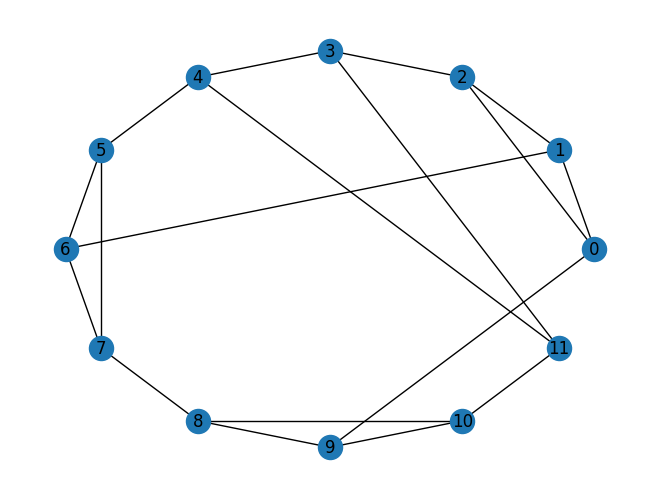

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\sa.salehi\Desktop\Graph\Project\project\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\sa.salehi\AppData\Local\Temp\ipykernel_16292\701854820.py", line 7, in <module>
    graph_details_manual_permutation(nx.truncated_tetrahedron_graph())
  File "C:\Users\sa.salehi\AppData\Local\Temp\ipykernel_16292\1069071637.py", line 11, in graph_details_manual_permutation
    is_ns, is_sym = is_node_similar_and_is_symmetry(graph)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sa.salehi\AppData\Local\Temp\ipykernel_16292\952465448.py", line 50, in is_node_similar_and_is_symmetry
    permute(graph,node_sets, edge_sets, [], list(graph.nodes()))
  File "C:\Users\sa.salehi\AppData\Local\Temp\ipykernel_16292\952465448.py", line 40, in permute
    permute(graph, node_sets, edge_sets, curr, remain_copy)
  File "C:\Users\sa.salehi

In [13]:
# n is dimension number. nodes number will be: 2 ** n
n = 3

# below function gives exception due to large amount of permutation. So we use manual permutation kind
# graph_details(nx.truncated_tetrahedron_graph(n))

graph_details_manual_permutation(nx.truncated_tetrahedron_graph())

# Torus (Heawood)

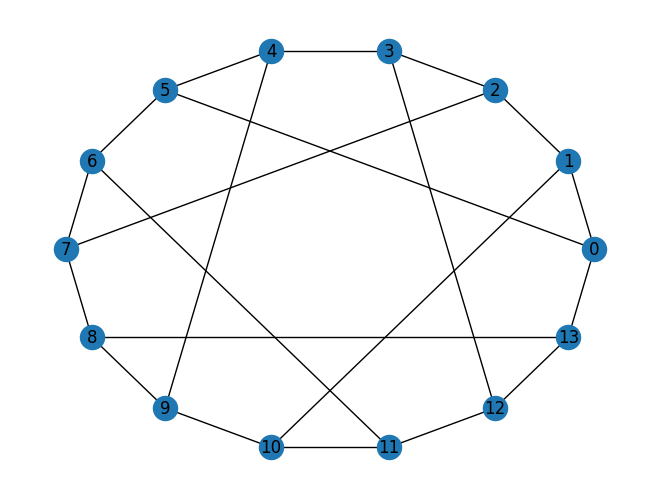

KeyboardInterrupt: 

In [14]:
# below function gives exception due to large amount of permutation. So we use manual permutation kind
# graph_details(nx.heawood_graph())

graph_details_manual_permutation(nx.heawood_graph())

# Ring (circulant_graph)

Ring Graph With Node Number:  2


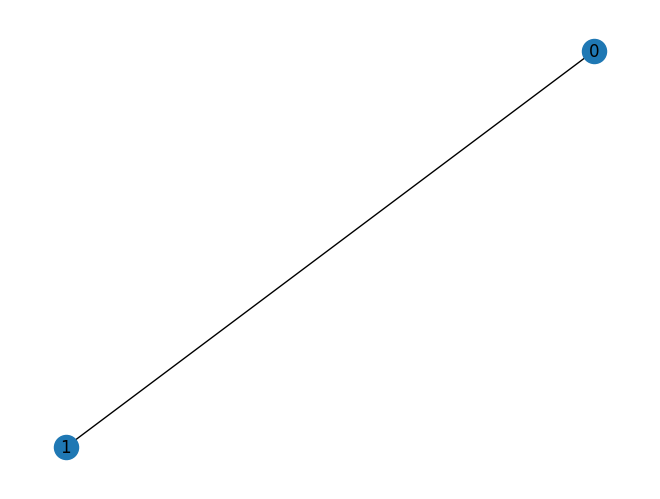

 Node Number:  2
 Edge Number:  1
 Is Optimally Connected:  False
 Diameter:  1
 Is Node Simmilar:  False
 Is Symmetry:  True
Ring Graph With Node Number:  3


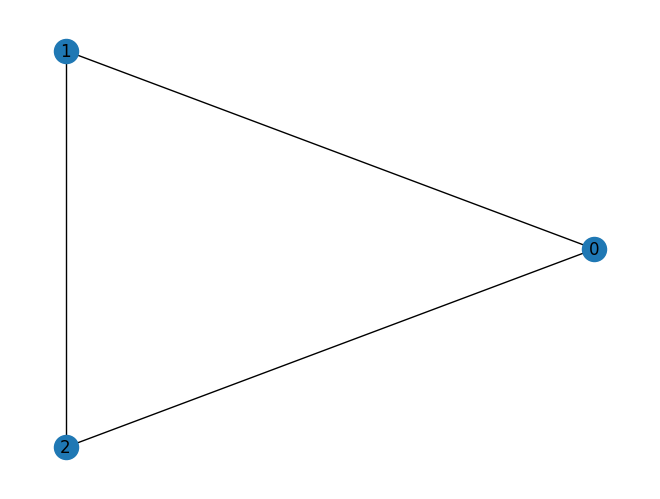

 Node Number:  3
 Edge Number:  3
 Is Optimally Connected:  False
 Diameter:  1
 Is Node Simmilar:  True
 Is Symmetry:  True
Ring Graph With Node Number:  4


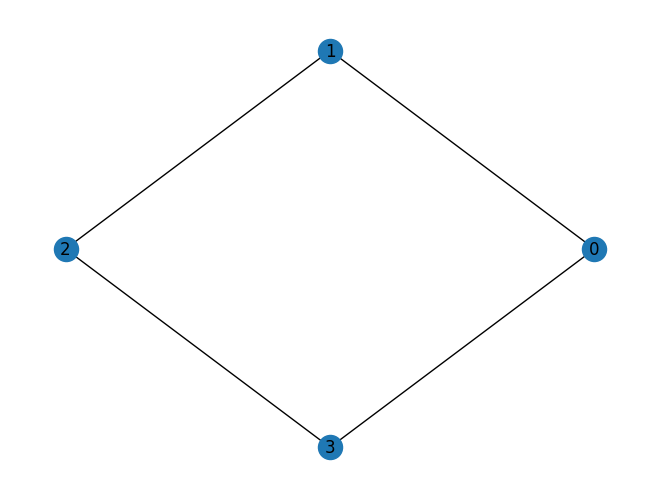

 Node Number:  4
 Edge Number:  4
 Is Optimally Connected:  False
 Diameter:  2
 Is Node Simmilar:  True
 Is Symmetry:  True
Ring Graph With Node Number:  5


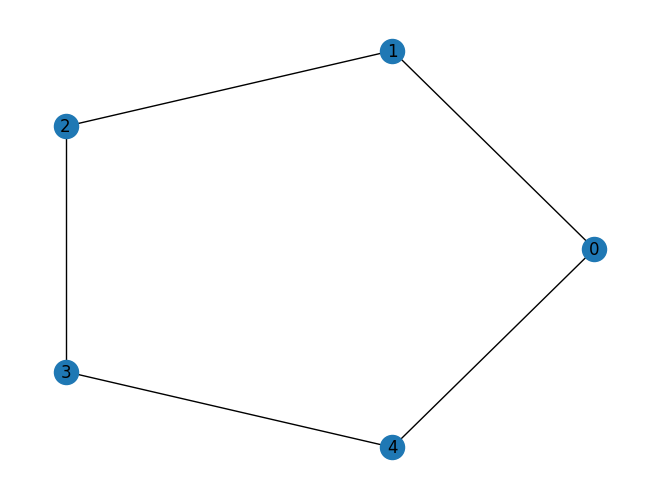

 Node Number:  5
 Edge Number:  5
 Is Optimally Connected:  False
 Diameter:  2
 Is Node Simmilar:  True
 Is Symmetry:  True
Ring Graph With Node Number:  6


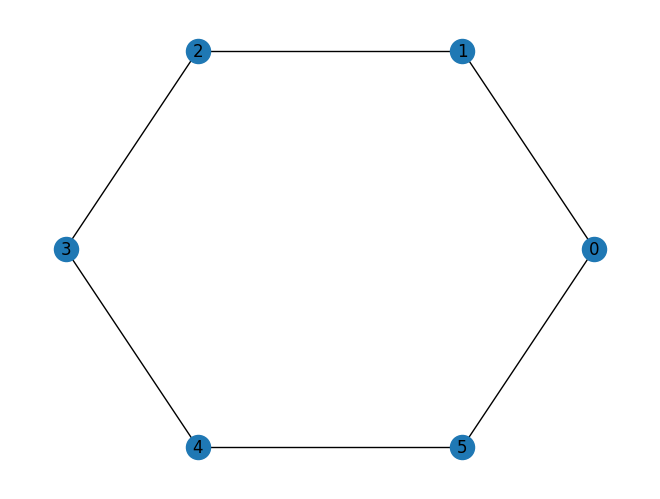

 Node Number:  6
 Edge Number:  6
 Is Optimally Connected:  False
 Diameter:  3
 Is Node Simmilar:  True
 Is Symmetry:  True
Ring Graph With Node Number:  7


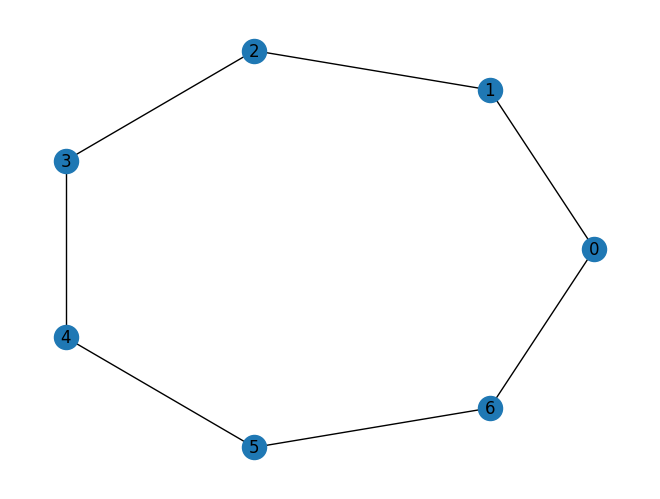

 Node Number:  7
 Edge Number:  7
 Is Optimally Connected:  False
 Diameter:  3
 Is Node Simmilar:  True
 Is Symmetry:  True
Ring Graph With Node Number:  8


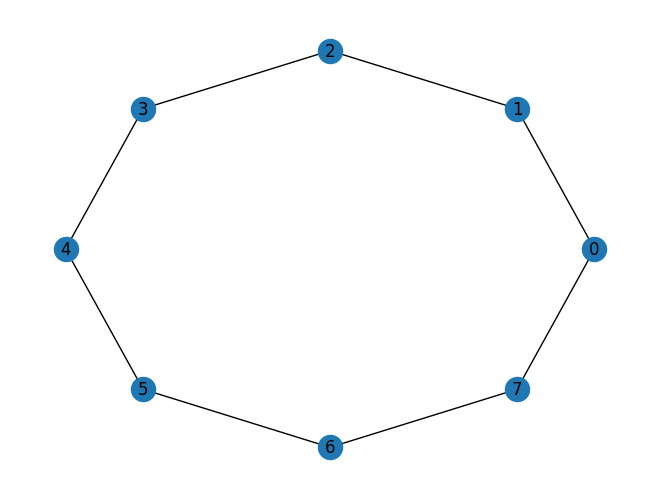

 Node Number:  8
 Edge Number:  8
 Is Optimally Connected:  False
 Diameter:  4
 Is Node Simmilar:  True
 Is Symmetry:  True
Ring Graph With Node Number:  9


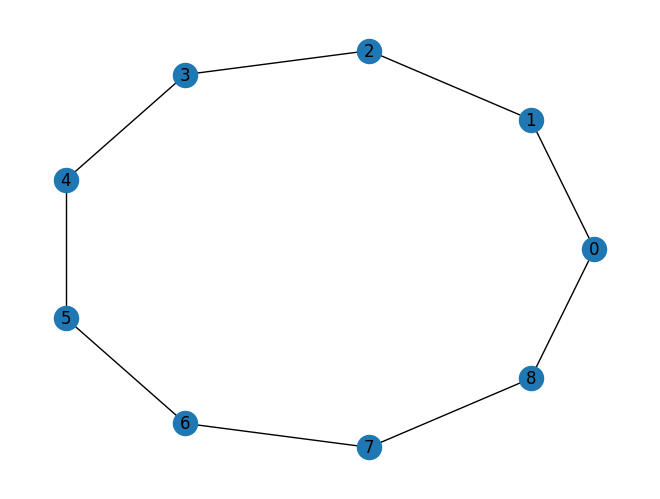

 Node Number:  9
 Edge Number:  9
 Is Optimally Connected:  False
 Diameter:  4
 Is Node Simmilar:  True
 Is Symmetry:  True
Ring Graph With Node Number:  10


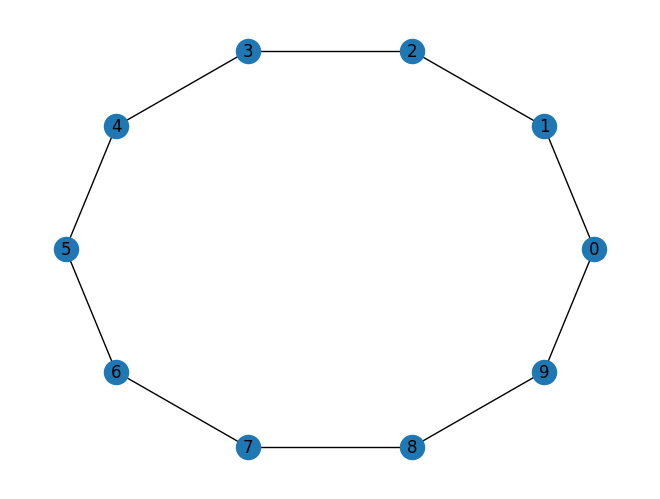

 Node Number:  10
 Edge Number:  10
 Is Optimally Connected:  False
 Diameter:  5
 Is Node Simmilar:  True
 Is Symmetry:  True


In [23]:
RING_MAX_NODE_NUMBER = 10
RING_MIN_NODE_NUMBER = 2
OFFSETS = [1] # list of connected neighbors(both side). as we want to have 
              # ring graph, so we have to connect each node to next node only.

rings = []

for node_number in range(RING_MIN_NODE_NUMBER, RING_MAX_NODE_NUMBER + 1):
    print('Ring Graph With Node Number: ', node_number)
    graph = nx.circulant_graph(node_number, OFFSETS)
    rings.append(graph)
    graph_details_manual_permutation(graph)

# Prism

### Generator

In [40]:
def generate_prism(half_node_number):
    inner_graph = nx.circulant_graph(half_node_number, [1])
    
    outer_graph = nx.circulant_graph(half_node_number, [1])
    # we should change index, otherwise nx.compose will make single node for all same node index in graphs
    nx.relabel_nodes(outer_graph, lambda x: x + half_node_number, copy=False)
    
    graph = nx.compose(inner_graph, outer_graph)
    
    for i in range(half_node_number):
        graph.add_edge(i, i + half_node_number)
    
    return graph

Prism Graph With Node Number:  6


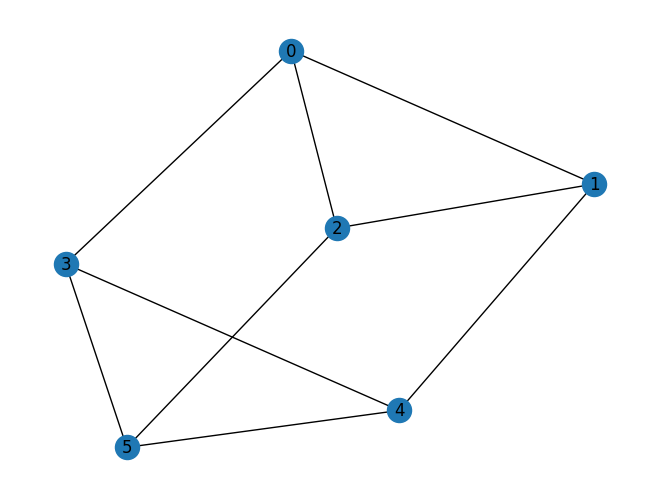

 Node Number:  6
 Edge Number:  9
 Is Optimally Connected:  False
 Diameter:  2
 Is Node Simmilar:  True
 Is Symmetry:  True
Prism Graph With Node Number:  8


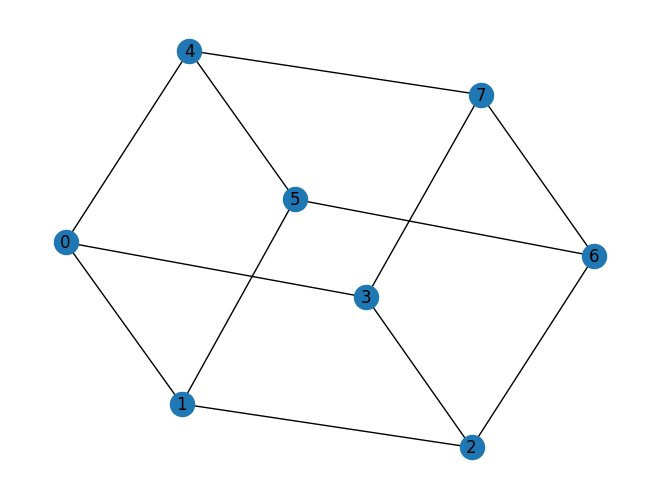

 Node Number:  8
 Edge Number:  12
 Is Optimally Connected:  False
 Diameter:  3
 Is Node Simmilar:  True
 Is Symmetry:  True
Prism Graph With Node Number:  10


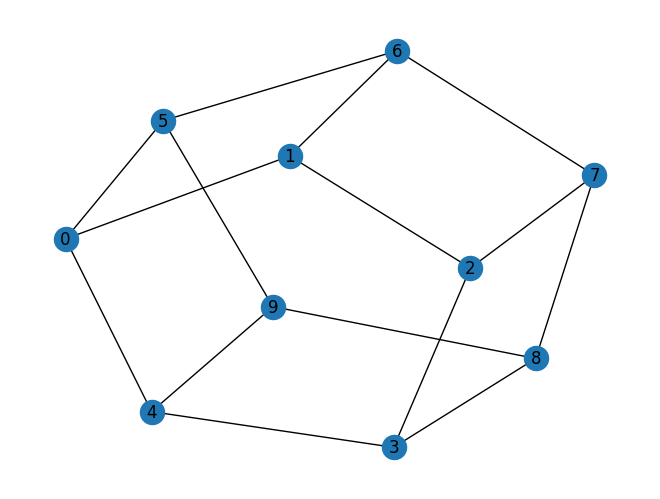

 Node Number:  10
 Edge Number:  15
 Is Optimally Connected:  False
 Diameter:  3
 Is Node Simmilar:  True
 Is Symmetry:  True


In [82]:
PRISM_MAX_HALF_NODE_NUMBER = 5
PRISM_MIN_HALF_NODE_NUMBER = 3

prisms = []

for half_node_number in range(PRISM_MIN_HALF_NODE_NUMBER, PRISM_MAX_HALF_NODE_NUMBER + 1):
    print('Prism Graph With Node Number: ', 2 * half_node_number)
    graph = generate_prism(half_node_number)
    prisms.append(graph)
    graph_details_manual_permutation(graph, draw_func=nx.draw)

# Antiprism

### Generator

In [75]:
def generate_antiprism(half_node_number):
    inner_graph = nx.circulant_graph(half_node_number, [1])
    
    outer_graph = nx.circulant_graph(half_node_number, [1])
    # we should change index, otherwise nx.compose will make single node for all same node index in graphs
    nx.relabel_nodes(outer_graph, lambda x: x + half_node_number, copy=False)
    
    graph = nx.compose(inner_graph, outer_graph)
    
    for i in range(half_node_number):
        graph.add_edge(i, i + half_node_number)
        graph.add_edge(i, ((i + 1)%half_node_number) + half_node_number)
    
    return graph

Antiprism Graph With Node Number:  6


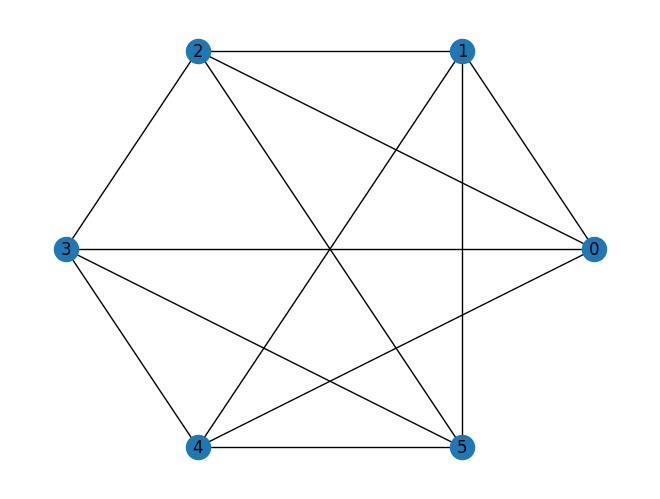

 Node Number:  6
 Edge Number:  12
 Is Optimally Connected:  False
 Diameter:  2
 Is Node Simmilar:  True
 Is Symmetry:  True
Antiprism Graph With Node Number:  8


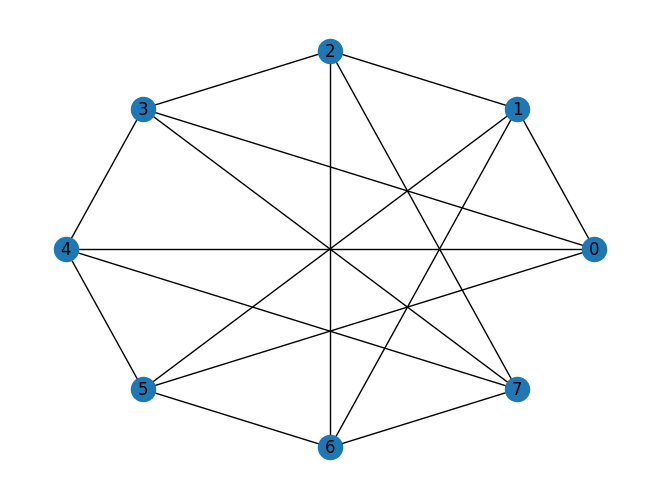

 Node Number:  8
 Edge Number:  16
 Is Optimally Connected:  False
 Diameter:  2
 Is Node Simmilar:  True
 Is Symmetry:  True
Antiprism Graph With Node Number:  10


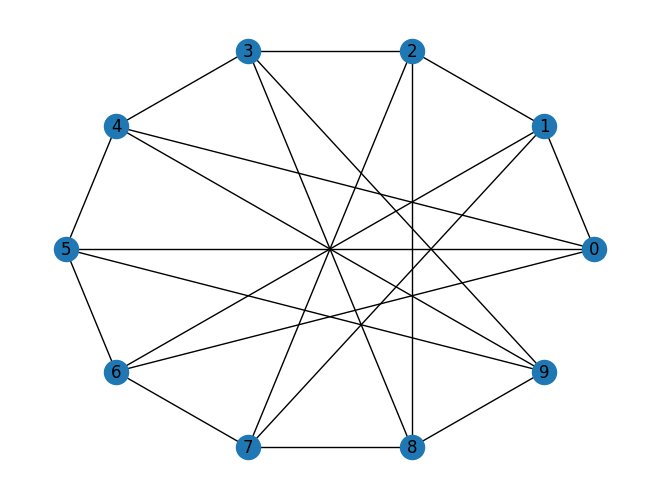

 Node Number:  10
 Edge Number:  20
 Is Optimally Connected:  False
 Diameter:  3
 Is Node Simmilar:  True
 Is Symmetry:  True


In [89]:
ANTIPRISM_MAX_HALF_NODE_NUMBER = 5
ANTIPRISM_MIN_HALF_NODE_NUMBER = 3

antiprisms = []
for half_node_number in range(ANTIPRISM_MIN_HALF_NODE_NUMBER, ANTIPRISM_MAX_HALF_NODE_NUMBER + 1):
    print('Antiprism Graph With Node Number: ', 2 * half_node_number)
    graph = generate_antiprism(half_node_number)
    antiprisms.append(graph)
    graph_details_manual_permutation(graph)

# Twisted Prism

### Generator

In [87]:
def generate_twisted_prism(laye_node_number, layer_number):
    if layer_number < 1 :
        return None
    
    if layer_number == 1:
        return nx.circulant_graph(laye_node_number, [1])
    
    if layer_number == 2:
        return generate_prism(laye_node_number)
    
    graph = nx.Graph()
    for layer in range(layer_number):
        graph_layer = nx.circulant_graph(laye_node_number, [1])
        nx.relabel_nodes(graph_layer, lambda x: x + (laye_node_number * layer), copy=False)
        graph = nx.compose(graph, graph_layer)
    
    for layer in range(layer_number-1):
        for node in range(laye_node_number):
            curr = node + (layer * laye_node_number)
            next_layer = curr + laye_node_number
            graph.add_edge(curr, next_layer)
    
    return graph

Twisted Prism Graph With 3 Layer And 3 Node Number In Each Layer.


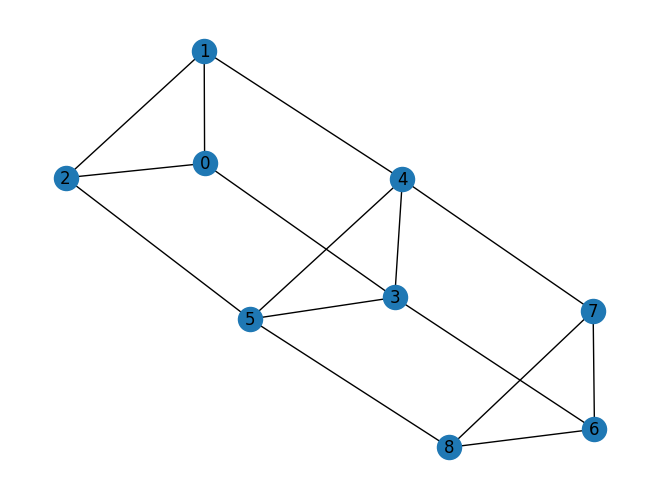

 Node Number:  9
 Edge Number:  15
 Is Optimally Connected:  False
 Diameter:  3
 Is Node Simmilar:  True
 Is Symmetry:  True


In [94]:
TWISTED_PRISM_MAX_LAYER_NODE_NUMBER = 3
TWISTED_PRISM_MIN_LAYER_NODE_NUMBER = 3
TWISTED_PRISM_MAX_LAYER_NUMBER = 3
TWISTED_PRISM_MIN_LAYER_NUMBER = 3

twisted_prisms = []
for layer_node_number in range(TWISTED_PRISM_MIN_LAYER_NODE_NUMBER, TWISTED_PRISM_MAX_LAYER_NODE_NUMBER + 1):
    for layer_number in range(TWISTED_PRISM_MIN_LAYER_NUMBER, TWISTED_PRISM_MAX_LAYER_NUMBER + 1):
        print(f'Twisted Prism Graph With {layer_number} Layer And {layer_node_number} Node Number In Each Layer.', )
        graph = generate_twisted_prism(layer_node_number, layer_number)
        twisted_prisms.append(graph)
        graph_details_manual_permutation(graph, draw_func=nx.draw)